In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

In [2]:
#Importing the dataset
df=pd.read_csv("parkinsons.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


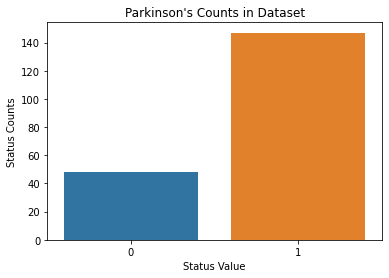

In [3]:
#Count Plot
sns.countplot(df['status'].values)
plt.xlabel('Status Value')
plt.ylabel('Status Counts')
plt.title("Parkinson's Counts in Dataset")
plt.show()

In [4]:
X=df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,18,19,20,21,22,23]].values
y=df.iloc[:,17].values
print(X)
print(y)

[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [5]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

In [7]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_
variance.tolist()

[0.5930371796269998,
 0.11471087542802144,
 0.07077209494236229,
 0.0653304799800119,
 0.04498695615272406,
 0.03290737481298078,
 0.023873831786462667,
 0.015489844999458813,
 0.013575804832397141,
 0.01023770045236558,
 0.004563937919097791,
 0.0035655589709119064,
 0.0029086371471309168,
 0.0017120269900488378,
 0.0009560227467250826,
 0.0006931270491024468,
 0.0004007093886020303,
 0.0002057114597299486,
 7.211001548133797e-05,
 1.3931498946663216e-08,
 1.3678861339142311e-09,
 4.0080190366340935e-38]

In [8]:
#N components = 2
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
#Shape after applying PCA
X_train.shape

(156, 2)

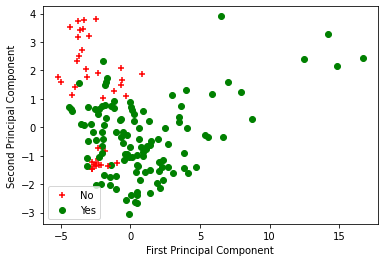

In [10]:
#Data after PCA
for i in range(0, X_train.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(X_train[i,0],X_train[i,1],c='r', marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(X_train[i,0],X_train[i,1],c='g', marker='o')
pl.xlabel("First Principal Component")
pl.ylabel("Second Principal Component")
pl.legend([c1, c2], ['No', 'Yes'])
pl.show()

In [11]:
#SVM Model
#Since data is not linearly separable, we use RBF kernel
c_range=[0.1, 0.5, 1, 10, 50, 100]
g_range=[0.01, 0.05, 0.07, 0.1, 1, 0.5,  5, 10, 50]
max_acc=0
for j in c_range:
    for k in g_range:
        classifier = SVC(kernel='rbf', C=j, gamma=k, random_state=0)
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        if (accuracy_score(y_test,y_pred)) > max_acc:
            max_acc=accuracy_score(y_test,y_pred)
            max_c=j
            max_g=k
        print("Accuracy: %.2f" %accuracy_score(y_test,y_pred),"Kernel: rbf C:",j,"Gamma:",k)
        print('Misclassified samples: %d' %(y_test!=y_pred).sum()) 

print()
print("Max accuracy: %.2f" %max_acc,"Kernel: rbf C:",max_c,"Gamma:",max_g)
#print(classification_report(y_test, y_pred))

Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 0.01
Misclassified samples: 10
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 0.05
Misclassified samples: 10
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 0.07
Misclassified samples: 10
Accuracy: 0.79 Kernel: rbf C: 0.1 Gamma: 0.1
Misclassified samples: 8
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 1
Misclassified samples: 10
Accuracy: 0.77 Kernel: rbf C: 0.1 Gamma: 0.5
Misclassified samples: 9
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 5
Misclassified samples: 10
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 10
Misclassified samples: 10
Accuracy: 0.74 Kernel: rbf C: 0.1 Gamma: 50
Misclassified samples: 10
Accuracy: 0.85 Kernel: rbf C: 0.5 Gamma: 0.01
Misclassified samples: 6
Accuracy: 0.87 Kernel: rbf C: 0.5 Gamma: 0.05
Misclassified samples: 5
Accuracy: 0.87 Kernel: rbf C: 0.5 Gamma: 0.07
Misclassified samples: 5
Accuracy: 0.87 Kernel: rbf C: 0.5 Gamma: 0.1
Misclassified samples: 5
Accuracy: 0.95 Kernel: rbf C: 0.5 Gamma: 1
Misclassified samples: 2
Accuracy: 0.87 

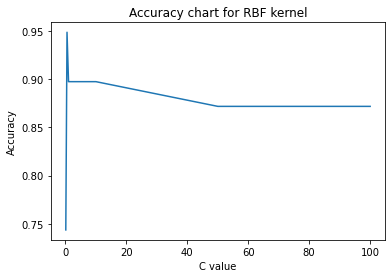

In [12]:
#Accuracy graph for varying C value for RBF kernel
c_range=[0.1, 0.5, 1, 10, 50, 100]
l=[]
for i in c_range:
    classifier = SVC(kernel='rbf', C=i, gamma=1, random_state=0)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    l.append(accuracy_score(y_test,y_pred))
plt.plot(c_range,l)
plt.title('Accuracy chart for RBF kernel')
plt.ylabel('Accuracy')
plt.xlabel('C value')
plt.show()

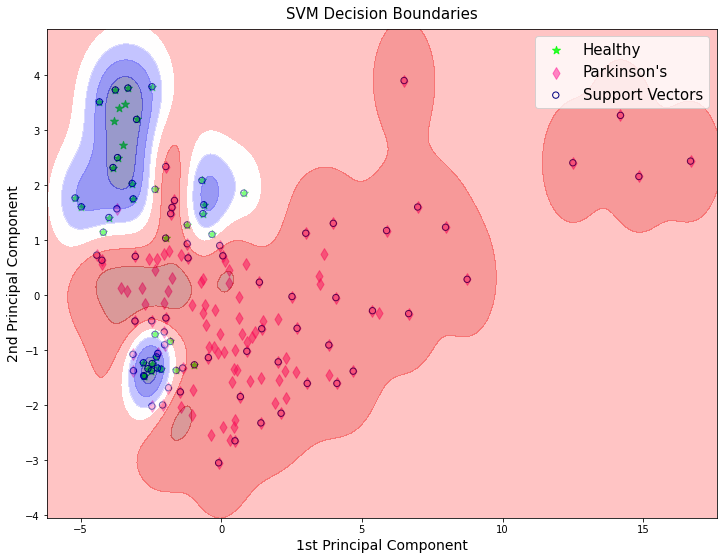

In [13]:
#SVM Decision Boundary Plot (Optimum Solution)
#Gamma = 1, C = 0.5

svm_model = SVC(kernel='rbf', C=0.5, gamma=1)
classify = svm_model.fit(X_train, y_train)

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))#,
                         #np.arange(z_min, z_max, h))
    return xx, yy

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = y_train.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:"Healthy",1:"Parkinson's"}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=40, facecolors='none', 
           edgecolors='navy', label='Support Vectors')

plot_contours(ax, classify, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)
plt.title("SVM Decision Boundaries",fontsize=15,pad=10)
plt.show()

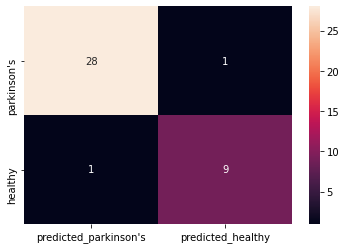

In [15]:
#Confusion Matrix
classifier = SVC(kernel='rbf', C=0.5, gamma=1, random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm=np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=["parkinson's","healthy"],columns=["predicted_parkinson's","predicted_healthy"])
sns.heatmap(confusion,annot=True)